In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
def plot_decision_boundary(svm_clf, min_x, max_x):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]

  x0 = np.linspace(min_x, max_x, 200)
  decision_boundary = -(w[0]/w[1])*x0 - b/w[1]
  margin = 1/w[1]

  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin

  svs = svm_clf.support_vectors_
  plt.scatter(svs[:,0], svs[:,1], s=180, facecolors='red')
  plt.plot(x0, decision_boundary, "k-")
  plt.plot(x0, gutter_up, "k--")
  plt.plot(x0, gutter_down, "k--")

In [ ]:
df = datasets.load_iris()

In [ ]:
X = df['data'][:,[2,3]]

In [ ]:
Y = df['target']

In [ ]:
svm_clf = SVC(kernel='linear', C=float('inf'))

In [ ]:
setosa_or_versicolor = (Y==0) | (Y==1)

In [ ]:
X = X[setosa_or_versicolor]
Y = Y[setosa_or_versicolor]

In [ ]:
svm_clf.fit(X, Y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_scaler = StandardScaler()
X_scaled = svm_scaler.fit_transform(X)
svm_clf.fit(X_scaled,Y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(-2.0, 2.0, -2.0, 2.0)

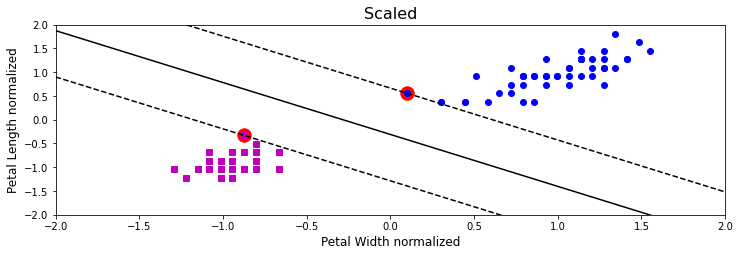

In [ ]:
plt.figure(figsize=(12,3.5))

plt.plot(X_scaled[:,0][Y==0], X_scaled[:,1][Y==0], "ms")
plt.plot(X_scaled[:,0][Y==1], X_scaled[:,1][Y==1], "bo")
plot_decision_boundary(svm_clf, -2, 2)
plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2,2,-2,2])